In [130]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # this package is used for time series analysis and visualization tools
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr #this module provides a wide range of statistical functions and probability distributions. 

In [131]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')


In [132]:
ice_cream_heater_df = pd.read_csv('Icecream_heater_data.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
ice_cream_heater_df.head(5)

C:\Users\SAGNIK CHANDA\AppData\Local\Temp\ipykernel_16500\3020566387.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ice_cream_heater_df = pd.read_csv('Icecream_heater_data.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


,heater,ice cream,Unnamed: 3
Month,,,
2004-01-01,27,13,NaN
2004-02-01,18,15,NaN
2004-03-01,14,16,NaN
2004-04-01,13,19,NaN
2004-05-01,13,21,NaN


In [133]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))
#pd.infer_freq() function is used to infer the frequency of the DataFrame based on its index
#Thus,  pandas will automatically determine the frequency of the time series data based on the 
# time interval between consecutive dates in the index.
#ice_cream_heater_df will now have a regular time series index with a fixed frequency, which can be useful for time series analysis and visualization

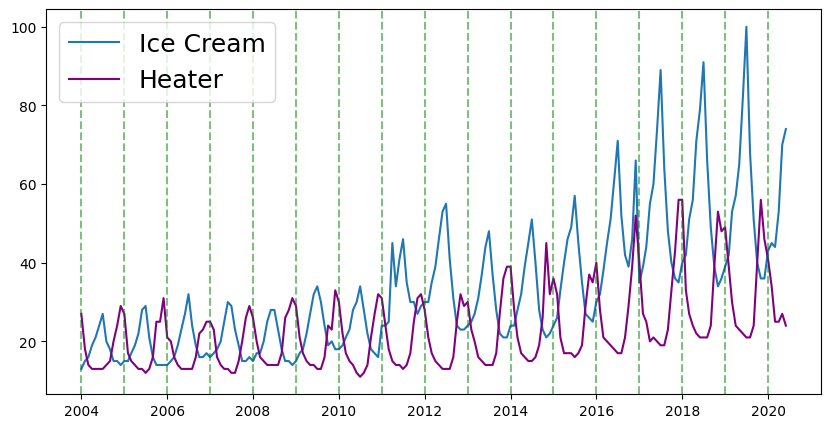

In [134]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='purple')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5) #Note alpha is set to 0.5, which specifies the transparency level of the line to be 50%
#axvline() function is used to add a vertical line to the plot in this case this case the dotted green lines
plt.legend(['Ice Cream', 'Heater'], fontsize=18)
#plt.legend() is a function that adds a legend to the plot. 
# Legend is a key that explains the labels and colors used in the plot.

In [135]:
#NORMALIZE
avgs = ice_cream_heater_df.mean()
devs = ice_cream_heater_df.std()#devs is a Series object containing the standard deviation values for each column in the DataFrame.
#avgs is a Series object that contains the mean values for each column in the DataFrame.
#Here, ice_cream_heater_df DataFrame has columns named "ice cream" and "heater", avgs will be a Series object with two values representing the mean values for each column.

In [136]:
for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col] #standardize the values in the ice_cream_heater_df DataFrame.
# used to retrieve specific rows or columns based on their index.

,heater,ice cream,Unnamed: 3
Month,,,
2004-01-01,0.429490,-1.174946,NaN
2004-02-01,-0.489299,-1.057807,NaN
2004-03-01,-0.897650,-0.999237,NaN
2004-04-01,-0.999738,-0.823527,NaN
2004-05-01,-0.999738,-0.706388,NaN


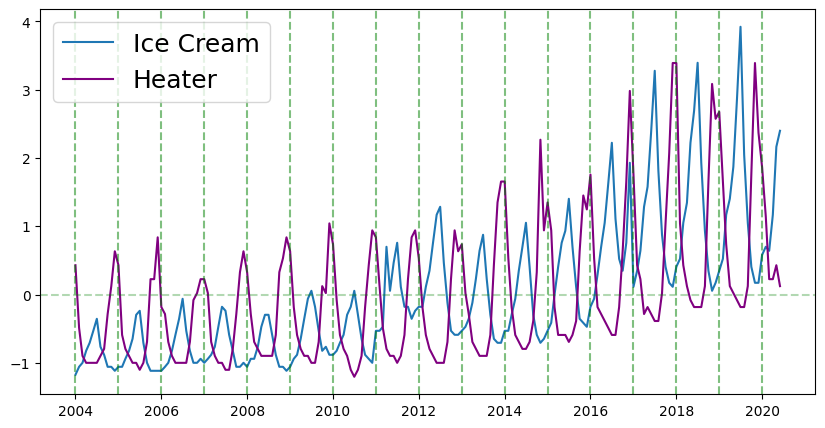

In [137]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='purple') #Note that the comma after the variable names is used to unpack a tuple
for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    plt.axhline(0, linestyle='--', color='green', alpha=0.3)
plt.legend(['Ice Cream', 'Heater'], fontsize=18)
ice_cream_heater_df.head(5)

In [138]:
#Removing trend by taking the first difference
ice_cream_heater_df = ice_cream_heater_df - ice_cream_heater_df.shift(fill_value=0)
ice_cream_heater_df.head(5)

,heater,ice cream,Unnamed: 3
Month,,,
2004-01-01,0.429490,-1.174946,NaN
2004-02-01,-0.918789,0.117140,NaN
2004-03-01,-0.408351,0.058570,NaN
2004-04-01,-0.102088,0.175710,NaN
2004-05-01,0.000000,0.117140,NaN


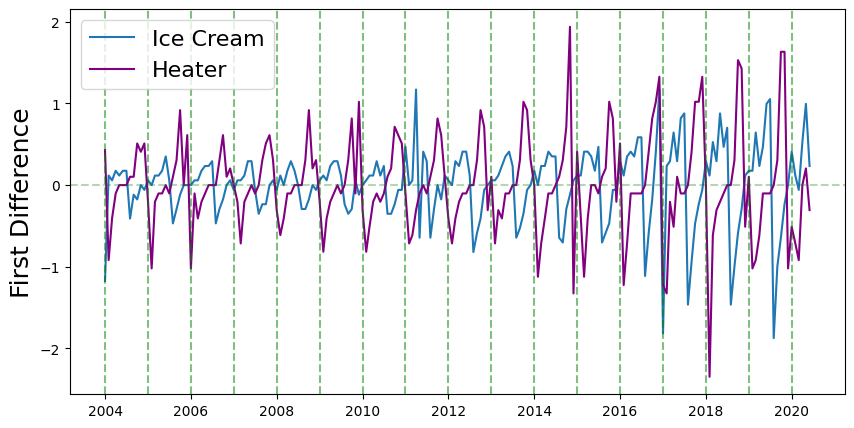

In [139]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='purple')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='green', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)
plt.show()

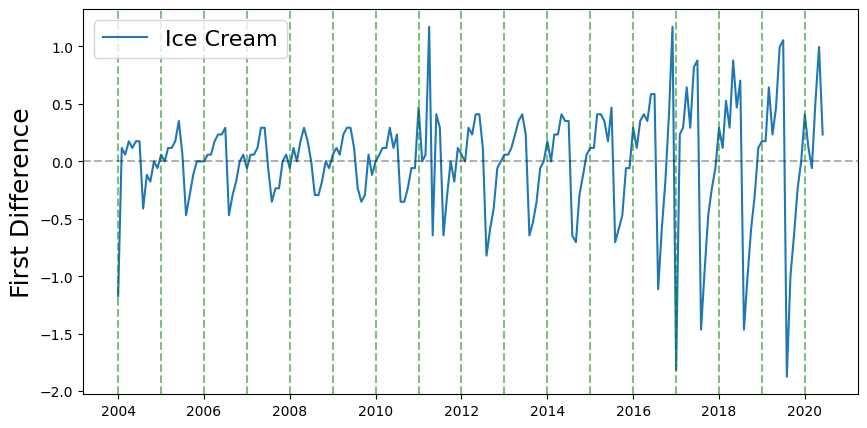

In [140]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

In [141]:
#Removing increasing volatility
annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()
#groupby() groups the data by year
#std() calculates the standard deviation of the values in each group, which represents the variability or volatility of the data within each year.
annual_volatility

,heater,ice cream,Unnamed: 3
Month,,,
2004,0.413525,0.383317,NaN
2005,0.474527,0.214837,NaN
2006,0.400148,0.227698,NaN
2007,0.359839,0.198947,NaN
2008,0.396182,0.183239,NaN
2009,0.499810,0.221038,NaN
2010,0.459566,0.211668,NaN
2011,0.443924,0.501018,NaN
2012,0.471104,0.389711,NaN


In [142]:
ice_cream_heater_df['ice_cream_annual_vol'] = [annual_volatility.loc[d.year, 'ice cream'] for d in ice_cream_heater_df.index] # Here we look up the annual volatility value for "ice cream" for a given year (i.e., d.year) in the "annual_volatility" DataFrame. 
ice_cream_heater_df['heater_annual_vol'] = [annual_volatility.loc[d.year, 'heater'] for d in ice_cream_heater_df.index]
#lambda is the anonymous function here
#We used loc() method as it is used to select rows and columns from a Pandas DataFrame or Series based on labels.
ice_cream_heater_df

,heater,ice cream,Unnamed: 3,ice_cream_annual_vol,heater_annual_vol
Month,,,,,
2004-01-01,0.429490,-1.174946,NaN,0.383317,0.413525
2004-02-01,-0.918789,0.117140,NaN,0.383317,0.413525
2004-03-01,-0.408351,0.058570,NaN,0.383317,0.413525
2004-04-01,-0.102088,0.175710,NaN,0.383317,0.413525
2004-05-01,0.000000,0.117140,NaN,0.383317,0.413525
...,...,...,...,...,...
2020-02-01,-0.714614,0.117140,NaN,0.369810,0.426657
2020-03-01,-0.918789,-0.058570,NaN,0.369810,0.426657
2020-04-01,0.000000,0.527129,NaN,0.369810,0.426657


In [143]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df.apply(lambda x: x['ice cream'] / annual_volatility.loc[x.name.year, 'ice cream'], axis=1)
ice_cream_heater_df['heater'] = ice_cream_heater_df.apply(lambda x: x['heater'] / annual_volatility.loc[x.name.year, 'heater'], axis=1)
#apply() is used to apply a function to each row of the DataFrame.
#lambda takes each row (x) and divides the "ice cream" and "heater" columns by their respective annual volatility values for that year, which are accessed from the annual_volatility DataFrame using the .loc method. 
#axis=1 in the apply() specifies that the function should be applied to each row, rather than each column.

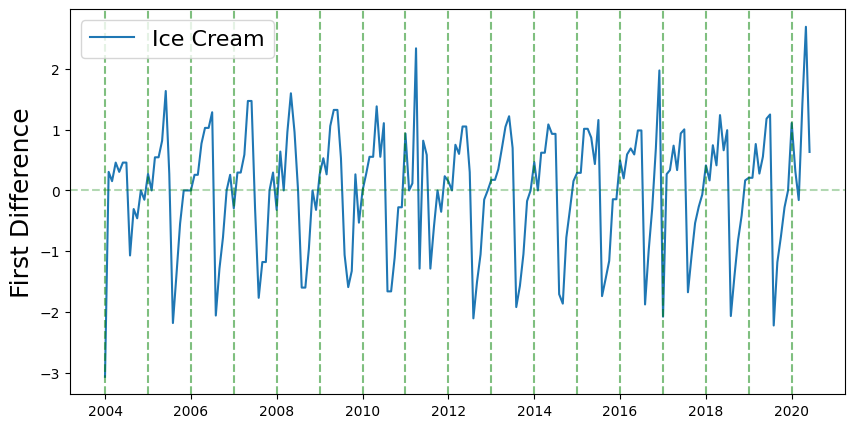

In [144]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='green', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

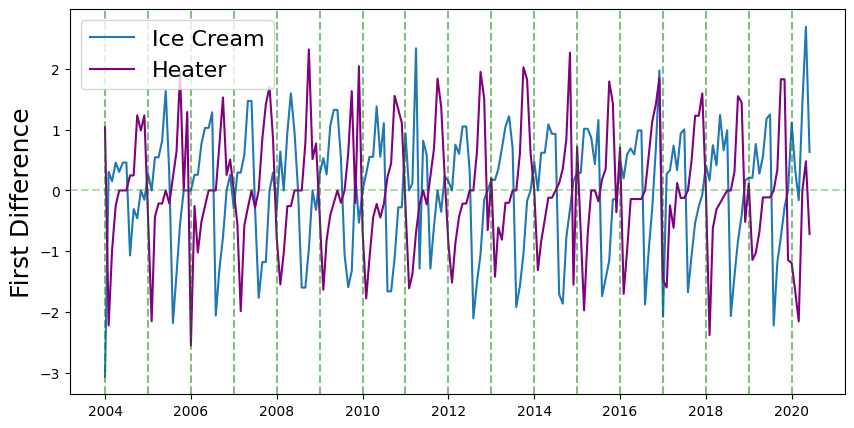

In [145]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='purple')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='green', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [146]:
#Removing seasonality
month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()
month_avgs

,heater,ice cream,Unnamed: 3,ice_cream_annual_vol,heater_annual_vol
Month,,,,,
1,-0.342068,-0.057629,NaN,0.414055,0.570882
2,-1.483744,0.230762,NaN,0.414055,0.570882
3,-1.063869,0.423300,NaN,0.414055,0.570882
4,-0.442995,0.808937,NaN,0.414055,0.570882
5,-0.121663,0.947841,NaN,0.414055,0.570882
6,-0.128425,0.958164,NaN,0.414055,0.570882
7,-0.107093,0.704083,NaN,0.416820,0.579896
8,0.075793,-1.749024,NaN,0.416820,0.579896
9,0.544711,-1.287015,NaN,0.416820,0.579896


In [147]:
ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])
ice_cream_heater_df

,heater,ice cream,Unnamed: 3,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,,
2004-01-01,1.038606,-3.065206,NaN,0.383317,0.413525,-0.057629,-0.342068
2004-02-01,-2.221845,0.305595,NaN,0.383317,0.413525,0.230762,-1.483744
2004-03-01,-0.987487,0.152797,NaN,0.383317,0.413525,0.423300,-1.063869
2004-04-01,-0.246872,0.458392,NaN,0.383317,0.413525,0.808937,-0.442995
2004-05-01,0.000000,0.305595,NaN,0.383317,0.413525,0.947841,-0.121663
...,...,...,...,...,...,...,...
2020-02-01,-1.674916,0.316756,NaN,0.369810,0.426657,0.230762,-1.483744
2020-03-01,-2.153463,-0.158378,NaN,0.369810,0.426657,0.423300,-1.063869
2020-04-01,0.000000,1.425403,NaN,0.369810,0.426657,0.808937,-0.442995


In [148]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']
ice_cream_heater_df

,heater,ice cream,Unnamed: 3,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,,
2004-01-01,1.380674,-3.007577,NaN,0.383317,0.413525,-0.057629,-0.342068
2004-02-01,-0.738100,0.074832,NaN,0.383317,0.413525,0.230762,-1.483744
2004-03-01,0.076382,-0.270503,NaN,0.383317,0.413525,0.423300,-1.063869
2004-04-01,0.196123,-0.350546,NaN,0.383317,0.413525,0.808937,-0.442995
2004-05-01,0.121663,-0.642247,NaN,0.383317,0.413525,0.947841,-0.121663
...,...,...,...,...,...,...,...
2020-02-01,-0.191172,0.085994,NaN,0.369810,0.426657,0.230762,-1.483744
2020-03-01,-1.089595,-0.581678,NaN,0.369810,0.426657,0.423300,-1.063869
2020-04-01,0.442995,0.616465,NaN,0.369810,0.426657,0.808937,-0.442995


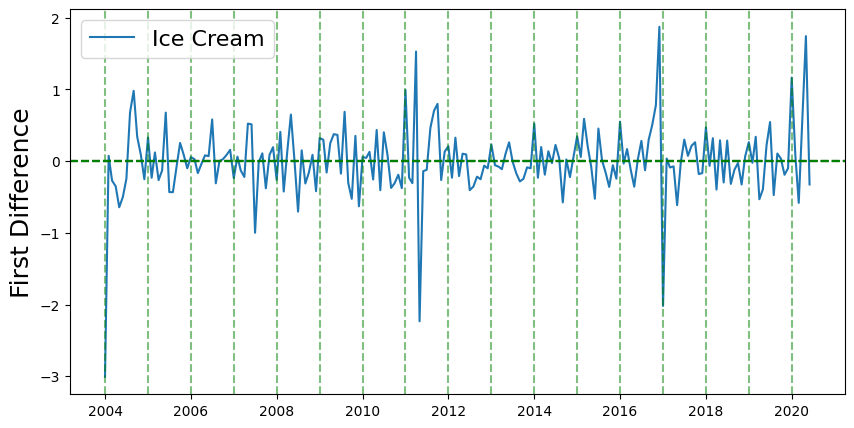

In [150]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    plt.axhline(0, linestyle='--', color='green', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)
plt.legend(['Ice Cream'], fontsize=16)

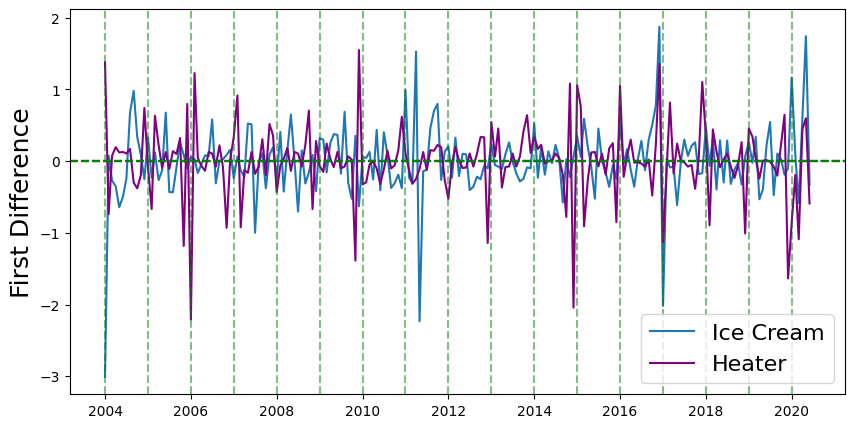

In [152]:
plt.figure(figsize=(10,5))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='purple')
for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='green', alpha=0.5)
    plt.axhline(0, linestyle='--', color='green', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)
plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [158]:
#ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(ice_cream_heater_df['ice cream'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.911556
p-value: 0.000000


In [163]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ice_cream_heater_df['heater'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.359535
p-value: 0.000000


c:\Users\SAGNIK CHANDA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


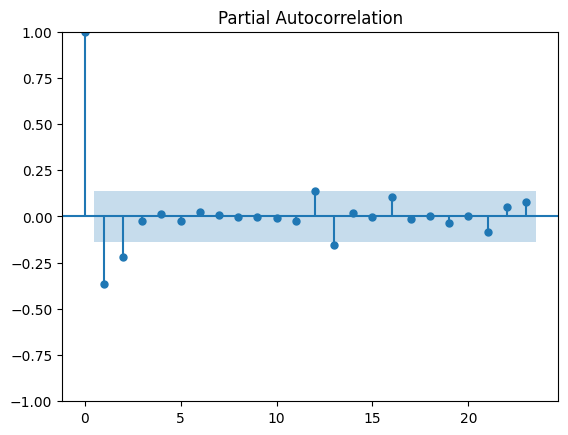

In [164]:
#PACF HEATER
plot_pacf(ice_cream_heater_df['heater'])
plt.show()

In [165]:
#Correlation between "heater" and lagged "ice cream"
for lag in range(1, 14):
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['ice cream'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.002428616517496442, pvalue=0.9729805107104568)
------
Lag: 2
PearsonRResult(statistic=-0.09926044944000499, pvalue=0.16630383925150075)
------
Lag: 3
PearsonRResult(statistic=-0.008829488168906706, pvalue=0.9024976830787637)
------
Lag: 4
PearsonRResult(statistic=0.06050687637201068, pvalue=0.4019828877933645)
------
Lag: 5
PearsonRResult(statistic=-0.05584699689329148, pvalue=0.4404618277720228)
------
Lag: 6
PearsonRResult(statistic=0.03602549575306978, pvalue=0.61983421417173)
------
Lag: 7
PearsonRResult(statistic=-0.03179715519085753, pvalue=0.6623497986789744)
------
Lag: 8
PearsonRResult(statistic=0.09548072771318522, pvalue=0.19005312100428973)
------
Lag: 9
PearsonRResult(statistic=-0.027257455709037235, pvalue=0.709661071104191)
------
Lag: 10
PearsonRResult(statistic=0.03912408307959038, pvalue=0.593985932263746)
------
Lag: 11
PearsonRResult(statistic=-0.11399234178347403, pvalue=0.12031860994270803)
------
Lag: 12
PearsonRResult(statistic=

In [166]:
#Fitting the VAR model
ice_cream_heater_df = ice_cream_heater_df[['ice cream', 'heater']]
model = VAR(ice_cream_heater_df)
model_fit = model.fit(maxlags=13)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Apr, 2023
Time:                     12:16:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.91061
Nobs:                     185.000    HQIC:                  -2.46964
Log likelihood:          -207.327    FPE:                  0.0580528
AIC:                     -2.85060    Det(Omega_mle):       0.0442074
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.030016         0.033523            0.895           0.371
L1.ice cream         -0.287412         0.079533           -3.614           0.000
L1.heater            -0.123387         0.073912         

In [167]:
#Our VAR model is Yt= -0.412742yt-1-0.191502yt-2+0.164134xt-13